In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

plt.style.use("seaborn-colorblind")
sns.set_style("dark")
df = pd.read_csv('data.csv')
df = df[list(df.columns)[1:]]
print(df.shape)
na = df.isnull().sum()
df = df.dropna(axis=0)
print(df.shape)
df.head()


%matplotlib inline

(313, 32)
(304, 32)


In [2]:
X = df.iloc[:, :-1]
y = df[["cd/A"]]
print(X.shape, y.shape)

(304, 31) (304, 1)


In [3]:
scaler = MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(X)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns = X.columns)

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = X.columns)

scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(X)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns = X.columns)

minmax_scaled_df

,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1
0,0.10,0.416667,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.175258,0.352941,0.461538,0.409091,0.0,0.461538,0.409091,0.415584,0.285714,0.666667
1,0.10,0.416667,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.175258,0.352941,0.461538,0.409091,0.0,0.461538,0.409091,0.415584,0.285714,0.666667
2,0.10,0.416667,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.175258,0.352941,0.461538,0.409091,0.0,0.461538,0.409091,0.415584,0.285714,0.666667
3,0.10,0.416667,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.175258,0.352941,0.461538,0.409091,0.0,0.461538,0.409091,0.415584,0.285714,0.666667
4,0.10,0.416667,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.175258,0.352941,0.461538,0.409091,0.0,0.461538,0.409091,0.415584,0.285714,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.96,0.166667,0.061728,0.461538,0.529412,0.061728,0.857143,0.0,0.095238,0.857143,...,0.329897,0.411765,0.407692,0.627273,0.0,0.407692,0.627273,0.480519,0.285714,0.133333
300,0.96,0.166667,0.061728,0.461538,0.470588,0.061728,0.857143,0.0,0.095238,0.857143,...,0.268041,0.588235,0.307692,0.681818,0.0,0.307692,0.681818,0.675325,0.619048,0.033333
301,0.96,0.166667,0.061728,0.461538,0.470588,0.061728,0.857143,0.0,0.095238,0.857143,...,0.268041,0.588235,0.307692,0.681818,0.0,0.307692,0.681818,0.675325,0.619048,0.033333
302,0.10,0.750000,0.382716,0.423077,0.000000,0.382716,0.785714,0.0,0.404762,0.785714,...,0.278351,0.705882,0.546154,0.572727,0.0,0.546154,0.572727,0.805195,0.619048,0.033333


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)

In [5]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [6]:
X1 = sm.add_constant(X_train)
ols = sm.OLS(y_train, X1)
lr = ols.fit()

selected_features = list(X.columns)
pmax = 1
while (len(selected_features)>0):
    p = []
    X_1 = X[selected_features]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = selected_features)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax>0.05):
        selected_features.remove(feature_with_p_max)
    else:
        break
        
print('The selected features are:', selected_features)

The selected features are: ['homo_HIL', 'thickness_HIL', 'homo_HTL1', 'homo_HTL2', 'lumo_HTL3', 'homo_HTL3', 'triplet_HTL', 'homo_EML', 'triplet_HOST', 'lumo_dopant', 'homo_dopant', 'triplet_dopant', 'total_ETL_thickness', 'homo_ETL1', 'lumo_ETL2']


# XGBoost

In [51]:
tuned_parameters = [{'max_depth': [5,10,15,20,25,30], 'learning_rate':[0.001, 0.01, 0.1, 0.5], 
                     'n_estimators':[100,150,200,250,300]}]
MSE_xgb = ['mean_squared_error(y_test, y_pred2)']
for value in MSE_xgb:
    regr = GridSearchCV(xgb.XGBRFRegressor(), tuned_parameters, cv=5)
    regr.fit(X_train, y_train)
    y_true, y_pred2 = y_test, regr.predict(X_test)
    
print('The best hyper-parameters for XGBoost are:', regr.best_params_)

KeyboardInterrupt: 

# AdaBoost

In [ ]:
tuned_parameters = [{'learning_rate':[0.01, 1, 2,3,4,5], 
                     'n_estimators':[100,200,300,400,500]}]
MSE_ada = ['mean_squared_error(y_test, y_pred3)']
for value in MSE_ada:
    adaregr = GridSearchCV(AdaBoostRegressor(), tuned_parameters, cv=5)
    adaregr.fit(X_train, y_train.values.ravel())
    y_true, y_pred3 = y_test, adaregr.predict(X_test)
    
print('The best hyper-parameters for AdaBoost are:', adaregr.best_params_)

# Decision Tree

In [ ]:
tuned_parameters = [{'max_depth': [1,2,3,4,5,10,15,20,25,50,100,200]}]
MSE_dt = ['mean_squared_error(y_test, y_pred4)']
for value in MSE_dt:
    regressor_dt = GridSearchCV(DecisionTreeRegressor(), tuned_parameters, cv=5)
    regressor_dt.fit(X_train, y_train.values.ravel())
    y_true, y_pred4 = y_test, regressor_dt.predict(X_test)
    
print('The best hyper-parameters for Decision Tree is:', regressor_dt.best_params_)

# Random Forest

In [ ]:
tuned_parameters = [{'max_depth': [5,10,15,20,50,70], 
                     'n_estimators':[10,25,50,100,150,200,250]}]
MSE_rf = ['mean_squared_error(y_test, y_pred5)']
for value in MSE_rf:
    regr_rf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5)
    regr_rf.fit(X_train, y_train.values.ravel())
    y_true, y_pred5 = y_test, regr_rf.predict(X_test)
    
print('The best hyper-parameters for Random Forest are:', regr_rf.best_params_)

# KNN

In [8]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

tuned_parameters = [{'n_neighbors': [1,2,3,4,5,10,15,20], 'p': [1,2]}]
MSE_knn = ['mean_squared_error(y_test, y_pred6)']
for value in MSE_knn:
    model = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=5)
    model.fit(X_train_scaled, y_train.values.ravel())
    y_true, y_pred6 = y_test, model.predict(X_test_scaled)
    
print('The best hyper-parameters for KNN are:', model.best_params_)

The best hyper-parameters for KNN are: {'n_neighbors': 1, 'p': 1}


# SVM

In [ ]:
tuned_parameters = [{'kernel': ['linear', 'rbf', 'poly'], 'C':[1,2,3,5,6,7,10], 'gamma': [0.0001, 0.001, 0.01, 0.1,1]}]
MSE_svm = ['mean_squared_error(y_test, y_pred7)']
for value in MSE_svm:
    svr_regr = GridSearchCV(SVR(), tuned_parameters, cv=5)
    svr_regr.fit(X_train_scaled, y_train.values.ravel())
    y_true, y_pred7 = y_test, svr_regr.predict(X_test_scaled)
    
print('The best hyper-parameters for SVR are:', svr_regr.best_params_)

In [9]:
X_lin = X[selected_features]
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_lin, y,test_size=0.2, random_state=7)

regressor = LinearRegression()
regressor.fit(X_train_lin, y_train_lin)

regr = xgb.XGBRegressor(learning_rate= 0.5, max_depth= 30, n_estimators= 200, random_state=0)
regr.fit(X_train, y_train.values.ravel())

adaregr = AdaBoostRegressor(random_state=0, learning_rate=2, n_estimators=500)
adaregr.fit(X_train, y_train.values.ravel())

regressor_dt = DecisionTreeRegressor(random_state=0, max_depth=200)
regressor_dt.fit(X_train, y_train.values.ravel())

regr_rf = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=150)
regr_rf.fit(X_train, y_train.values.ravel())

neigh = KNeighborsRegressor(n_neighbors=1, metric='minkowski', p=1)
neigh.fit(X_train_scaled, y_train.values.ravel())

svr_regr = SVR(gamma=0.1, C=10, kernel='rbf')
svr_regr.fit(X_train_scaled, y_train.values.ravel())

SVR(C=10, gamma=0.1)

In [11]:
y_pred1 = regressor.predict(X_test_lin)
y_pred2 = regr.predict(X_test)
y_pred3 = adaregr.predict(X_test)
y_pred4 = regressor_dt.predict(X_test)
y_pred5 = regr_rf.predict(X_test)
y_pred6 = neigh.predict(X_test_scaled)
y_pred7 = svr_regr.predict(X_test_scaled)

print('The R^2 value for Linear Regression is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred4)), 3))
print('The R^2 value for Random Forest Regressor is:', round((r2_score(y_test, y_pred5)), 3))
print('The R^2 value for KNN Regressor is:', round((r2_score(y_test, y_pred6)), 3))
print('The R^2 value for SVM Regressor is:', round((r2_score(y_test, y_pred7)), 3))

The R^2 value for Linear Regression is: 0.436
The R^2 value for XGBoost Regressor is: 0.683
The R^2 value for AdaBoost Regressor is: 0.677
The R^2 value for Decision Tree Regressor is: 0.315
The R^2 value for Random Forest Regressor is: 0.76
The R^2 value for KNN Regressor is: 0.711
The R^2 value for SVM Regressor is: 0.488


In [30]:
MSE_lr = mean_squared_error(y_test, y_pred1)
MSE_xgb = mean_squared_error(y_test, y_pred2)
MSE_ada = mean_squared_error(y_test, y_pred3)
MSE_dt = mean_squared_error(y_test, y_pred4)
MSE_rf = mean_squared_error(y_test, y_pred5)
MSE_knn = mean_squared_error(y_test, y_pred6)
MSE_svr = mean_squared_error(y_test, y_pred7)

print('The RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The RMSE value for Linear Regression is: 10.759
The RMSE value for XGBoost Regressor is: 8.066
The RMSE value for AdaBoost Regressor is: 8.147
The RMSE value for Decision Tree Regressor is: 11.86
The RMSE value for Random Forest Regressor is: 7.012
The RMSE value for KNN Regressor is: 7.704
The RMSE value for SVM Regressor is: 10.249


In [31]:
MSE_lr = mean_squared_error(y_test/y_test, y_pred1/y_test)
MSE_xgb = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred2/y_test.values.ravel())
MSE_ada = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred3/y_test.values.ravel())
MSE_dt = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred4/y_test.values.ravel())
MSE_rf = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred5/y_test.values.ravel())
MSE_knn = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred6/y_test.values.ravel())
MSE_svr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred7/y_test.values.ravel())


print('The relative RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The relative RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The relative RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The relative RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The relative RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The relative RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The relative RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The relative RMSE value for Linear Regression is: 1.741
The relative RMSE value for XGBoost Regressor is: 0.693
The relative RMSE value for AdaBoost Regressor is: 1.15
The relative RMSE value for Decision Tree Regressor is: 1.152
The relative RMSE value for Random Forest Regressor is: 0.835
The relative RMSE value for KNN Regressor is: 0.666
The relative RMSE value for SVM Regressor is: 1.219


In [32]:
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train.values.ravel())

regr = xgb.XGBRegressor(learning_rate= 0.5, max_depth= 30, n_estimators= 200, random_state=0)
regr.fit(X_train, y_train.values.ravel())

adaregr = AdaBoostRegressor(random_state=0, learning_rate=2, n_estimators=500)
adaregr.fit(X_train, y_train.values.ravel())

regressor_dt = DecisionTreeRegressor(random_state=0, max_depth=200)
regressor_dt.fit(X_train, y_train.values.ravel())

regr_rf = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=150)
regr_rf.fit(X_train, y_train.values.ravel())

neigh = KNeighborsRegressor(n_neighbors=1, metric='minkowski', p=1)
neigh.fit(X_train_scaled, y_train.values.ravel())

svr_regr = SVR(gamma=0.1, C=10, kernel='rbf')
svr_regr.fit(X_train_scaled, y_train.values.ravel())

SVR(C=10, gamma=0.1)

In [33]:
y_pred1 = regressor.predict(X_test)
y_pred2 = regr.predict(X_test)
y_pred3 = adaregr.predict(X_test)
y_pred4 = regressor_dt.predict(X_test)
y_pred5 = regr_rf.predict(X_test)
y_pred6 = neigh.predict(X_test_scaled)
y_pred7 = svr_regr.predict(X_test_scaled)

print('The R^2 value for Linear Regression is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred4)), 3))
print('The R^2 value for Random Forest Regressor is:', round((r2_score(y_test, y_pred5)), 3))
print('The R^2 value for KNN Regressor is:', round((r2_score(y_test, y_pred6)), 3))
print('The R^2 value for SVM Regressor is:', round((r2_score(y_test, y_pred7)), 3))

The R^2 value for Linear Regression is: 0.436
The R^2 value for XGBoost Regressor is: 0.779
The R^2 value for AdaBoost Regressor is: 0.611
The R^2 value for Decision Tree Regressor is: 0.719
The R^2 value for Random Forest Regressor is: 0.773
The R^2 value for KNN Regressor is: 0.732
The R^2 value for SVM Regressor is: 0.395


In [34]:
MSE_lr = mean_squared_error(y_test, y_pred1)
MSE_xgb = mean_squared_error(y_test, y_pred2)
MSE_ada = mean_squared_error(y_test, y_pred3)
MSE_dt = mean_squared_error(y_test, y_pred4)
MSE_rf = mean_squared_error(y_test, y_pred5)
MSE_knn = mean_squared_error(y_test, y_pred6)
MSE_svr = mean_squared_error(y_test, y_pred7)

print('The RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The RMSE value for Linear Regression is: 10.759
The RMSE value for XGBoost Regressor is: 6.733
The RMSE value for AdaBoost Regressor is: 8.942
The RMSE value for Decision Tree Regressor is: 7.589
The RMSE value for Random Forest Regressor is: 6.827
The RMSE value for KNN Regressor is: 7.417
The RMSE value for SVM Regressor is: 11.143


In [36]:
MSE_lr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred1/y_test.values.ravel())
MSE_xgb = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred2/y_test.values.ravel())
MSE_ada = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred3/y_test.values.ravel())
MSE_dt = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred4/y_test.values.ravel())
MSE_rf = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred5/y_test.values.ravel())
MSE_knn = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred6/y_test.values.ravel())
MSE_svr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred7/y_test.values.ravel())


print('The relative RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The relative RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The relative RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The relative RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The relative RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The relative RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The relative RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The relative RMSE value for Linear Regression is: 1.741
The relative RMSE value for XGBoost Regressor is: 0.915
The relative RMSE value for AdaBoost Regressor is: 1.472
The relative RMSE value for Decision Tree Regressor is: 0.694
The relative RMSE value for Random Forest Regressor is: 0.94
The relative RMSE value for KNN Regressor is: 0.585
The relative RMSE value for SVM Regressor is: 1.43


In [ ]:
importance = regr.feature_importances_.tolist()
names = list(selected_features)

importance, names = zip(*sorted(zip(importance, names), reverse=True))
importance = [round(float(i), 3) for i in importance]

importance, names = zip(*sorted(zip(importance, names), reverse=False))
x = np.arange(X.shape[1])
plt.figure(figsize=(25,20));
fig = plt.barh(x, importance, 0.8, align='center')
plt.xlabel('Важность',fontsize=20)
plt.ylabel('Признаки',fontsize=20)
plt.title('Важность признаков', fontsize=24)
plt.yticks(x,names,fontsize=18)
plt.xticks( fontsize=18);


In [38]:
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)



regressor = LinearRegression()
regressor.fit(X_train, y_train.values.ravel())

regr = xgb.XGBRegressor(learning_rate= 0.5, max_depth= 30, n_estimators= 200, random_state=0)
regr.fit(X_train, y_train.values.ravel())

adaregr = AdaBoostRegressor(random_state=0, learning_rate=2, n_estimators=500)
adaregr.fit(X_train, y_train.values.ravel())

regressor_dt = DecisionTreeRegressor(random_state=0, max_depth=200)
regressor_dt.fit(X_train, y_train.values.ravel())

regr_rf = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=150)
regr_rf.fit(X_train, y_train.values.ravel())

neigh = KNeighborsRegressor(n_neighbors=1, metric='minkowski', p=1)
neigh.fit(X_train_scaled, y_train.values.ravel())

svr_regr = SVR(gamma=0.1, C=10, kernel='rbf')
svr_regr.fit(X_train_scaled, y_train.values.ravel())

y_pred1 = regressor.predict(X_test)
y_pred2 = regr.predict(X_test)
y_pred3 = adaregr.predict(X_test)
y_pred4 = regressor_dt.predict(X_test)
y_pred5 = regr_rf.predict(X_test)
y_pred6 = neigh.predict(X_test_scaled)
y_pred7 = svr_regr.predict(X_test_scaled)

print('The R^2 value for Linear Regression is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred4)), 3))
print('The R^2 value for Random Forest Regressor is:', round((r2_score(y_test, y_pred5)), 3))
print('The R^2 value for KNN Regressor is:', round((r2_score(y_test, y_pred6)), 3))
print('The R^2 value for SVM Regressor is:', round((r2_score(y_test, y_pred7)), 3))
print('---------------------------------------------------------------------')
MSE_lr = mean_squared_error(y_test, y_pred1)
MSE_xgb = mean_squared_error(y_test, y_pred2)
MSE_ada = mean_squared_error(y_test, y_pred3)
MSE_dt = mean_squared_error(y_test, y_pred4)
MSE_rf = mean_squared_error(y_test, y_pred5)
MSE_knn = mean_squared_error(y_test, y_pred6)
MSE_svr = mean_squared_error(y_test, y_pred7)

print('The RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada)), 3)
print('The RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))
print('---------------------------------------------------------------------')
MSE_lr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred1/y_test.values.ravel())
MSE_xgb = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred2/y_test.values.ravel())
MSE_ada = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred3/y_test.values.ravel())
MSE_dt = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred4/y_test.values.ravel())
MSE_rf = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred5/y_test.values.ravel())
MSE_knn = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred6/y_test.values.ravel())
MSE_svr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred7/y_test.values.ravel())


print('The relative RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The relative RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The relative RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The relative RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The relative RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The relative RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The relative RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The R^2 value for Linear Regression is: 0.436
The R^2 value for XGBoost Regressor is: 0.779
The R^2 value for AdaBoost Regressor is: 0.611
The R^2 value for Decision Tree Regressor is: 0.719
The R^2 value for Random Forest Regressor is: 0.773
The R^2 value for KNN Regressor is: 0.064
The R^2 value for SVM Regressor is: 0.188
---------------------------------------------------------------------
The RMSE value for Linear Regression is: 10.759
The RMSE value for XGBoost Regressor is: 6.733
The RMSE value for AdaBoost Regressor is: 9 3
The RMSE value for Decision Tree Regressor is: 7.589
The RMSE value for Random Forest Regressor is: 6.827
The RMSE value for KNN Regressor is: 13.862
The RMSE value for SVM Regressor is: 12.914
---------------------------------------------------------------------
The relative RMSE value for Linear Regression is: 1.741
The relative RMSE value for XGBoost Regressor is: 0.915
The relative RMSE value for AdaBoost Regressor is: 1.472
The relative RMSE value for D

In [7]:
X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


regressor = LinearRegression()
regressor.fit(X_train, y_train.values.ravel())

regr = xgb.XGBRegressor(learning_rate= 0.5, max_depth= 30, n_estimators= 200, random_state=0)
regr.fit(X_train, y_train.values.ravel())

adaregr = AdaBoostRegressor(random_state=0, learning_rate=2, n_estimators=500)
adaregr.fit(X_train, y_train.values.ravel())

regressor_dt = DecisionTreeRegressor(random_state=0, max_depth=200)
regressor_dt.fit(X_train, y_train.values.ravel())

regr_rf = RandomForestRegressor(random_state=0, max_depth=20, n_estimators=150)
regr_rf.fit(X_train, y_train.values.ravel())

neigh = KNeighborsRegressor(n_neighbors=1, metric='minkowski', p=1)
neigh.fit(X_train_scaled, y_train.values.ravel())

svr_regr = SVR(gamma=0.1, C=10, kernel='rbf')
svr_regr.fit(X_train_scaled, y_train.values.ravel())

y_pred1 = regressor.predict(X_test)
y_pred2 = regr.predict(X_test)
y_pred3 = adaregr.predict(X_test)
y_pred4 = regressor_dt.predict(X_test)
y_pred5 = regr_rf.predict(X_test)
y_pred6 = neigh.predict(X_test_scaled)
y_pred7 = svr_regr.predict(X_test_scaled)

print('The R^2 value for Linear Regression is:', round((r2_score(y_test, y_pred1)), 3))
print('The R^2 value for XGBoost Regressor is:', round((r2_score(y_test, y_pred2)), 3))
print('The R^2 value for AdaBoost Regressor is:', round((r2_score(y_test, y_pred3)), 3))
print('The R^2 value for Decision Tree Regressor is:', round((r2_score(y_test, y_pred4)), 3))
print('The R^2 value for Random Forest Regressor is:', round((r2_score(y_test, y_pred5)), 3))
print('The R^2 value for KNN Regressor is:', round((r2_score(y_test, y_pred6)), 3))
print('The R^2 value for SVM Regressor is:', round((r2_score(y_test, y_pred7)), 3))

MSE_lr = mean_squared_error(y_test, y_pred1)
MSE_xgb = mean_squared_error(y_test, y_pred2)
MSE_ada = mean_squared_error(y_test, y_pred3)
MSE_dt = mean_squared_error(y_test, y_pred4)
MSE_rf = mean_squared_error(y_test, y_pred5)
MSE_knn = mean_squared_error(y_test, y_pred6)
MSE_svr = mean_squared_error(y_test, y_pred7)
print('---------------------------------------------------------------------')
print('The RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))
print('---------------------------------------------------------------------')

MSE_lr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred1/y_test.values.ravel())
MSE_xgb = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred2/y_test.values.ravel())
MSE_ada = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred3/y_test.values.ravel())
MSE_dt = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred4/y_test.values.ravel())
MSE_rf = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred5/y_test.values.ravel())
MSE_knn = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred6/y_test.values.ravel())
MSE_svr = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), y_pred7/y_test.values.ravel())


print('The relative RMSE value for Linear Regression is:', round(np.sqrt(MSE_lr), 3))
print('The relative RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
print('The relative RMSE value for AdaBoost Regressor is:', round(np.sqrt(MSE_ada), 3))
print('The relative RMSE value for Decision Tree Regressor is:', round(np.sqrt(MSE_dt), 3))
print('The relative RMSE value for Random Forest Regressor is:', round(np.sqrt(MSE_rf), 3))
print('The relative RMSE value for KNN Regressor is:', round(np.sqrt(MSE_knn), 3))
print('The relative RMSE value for SVM Regressor is:', round(np.sqrt(MSE_svr), 3))

The R^2 value for Linear Regression is: 0.436
The R^2 value for XGBoost Regressor is: 0.779
The R^2 value for AdaBoost Regressor is: 0.611
The R^2 value for Decision Tree Regressor is: 0.719
The R^2 value for Random Forest Regressor is: 0.773
The R^2 value for KNN Regressor is: 0.742
The R^2 value for SVM Regressor is: 0.513
---------------------------------------------------------------------
The RMSE value for Linear Regression is: 10.759
The RMSE value for XGBoost Regressor is: 6.733
The RMSE value for AdaBoost Regressor is: 8.942
The RMSE value for Decision Tree Regressor is: 7.589
The RMSE value for Random Forest Regressor is: 6.827
The RMSE value for KNN Regressor is: 7.27
The RMSE value for SVM Regressor is: 9.995
---------------------------------------------------------------------
The relative RMSE value for Linear Regression is: 1.741
The relative RMSE value for XGBoost Regressor is: 0.915
The relative RMSE value for AdaBoost Regressor is: 1.472
The relative RMSE value for De

,Реальные значения,Предсказанные,RMSE
0,1.0,1.120463,3.047713
1,1.0,1.552810,10.669231
2,1.0,1.137076,0.808749
3,1.0,0.480251,9.199564
4,1.0,0.845498,6.025562
...,...,...,...
56,1.0,1.135572,6.398988
57,1.0,1.391602,9.790047
58,1.0,1.390966,4.574300
59,1.0,2.494025,20.901411


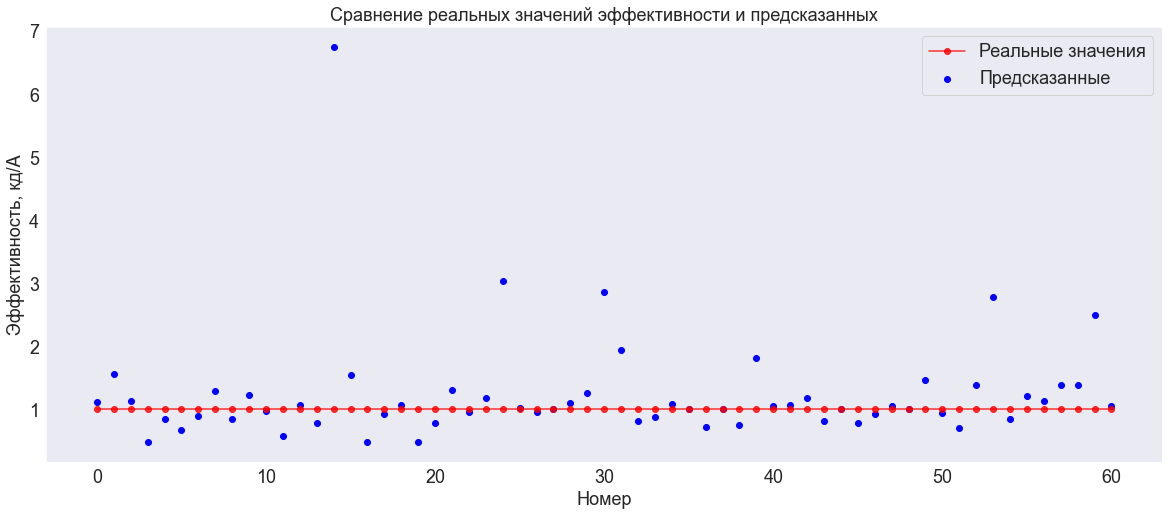

In [8]:
blablabla = list(range(len(y_test)))
plt.figure(figsize=(20,8))
plt.plot(blablabla, y_test.values.ravel()/y_test.values.ravel(), '-or', label='Реальные значения', alpha=0.8)
plt.scatter(blablabla, y_pred2/y_test.values.ravel(), c='b', label='Предсказанные')
plt.title('Сравнение реальных значений эффективности и предсказанных', fontsize=18)
plt.xlabel('Номер', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Эффективность, кд/А', fontsize=18)
plt.legend(fontsize=18)
ahahahha = np.sqrt((y_test.values.ravel() - y_pred2)**2)

pd.DataFrame({'Реальные значения': y_test.values.ravel()/y_test.values.ravel(),
              'Предсказанные': y_pred2/y_test.values.ravel(),
              'RMSE': ahahahha})

In [21]:
baza = sorted(y_pred2/y_test.values.ravel(), reverse=True)
baza[0] = 1
baza[1] = 1
baza[2] = 1
baza[3] = 1
baza[4] = 1
baza
MSE_xgb = mean_squared_error(y_test.values.ravel()/y_test.values.ravel(), baza)

print('The relative RMSE value for XGBoost Regressor is:', round(np.sqrt(MSE_xgb), 3))
MSE_xgb

The relative RMSE value for XGBoost Regressor is: 0.285


0.08094596386883617

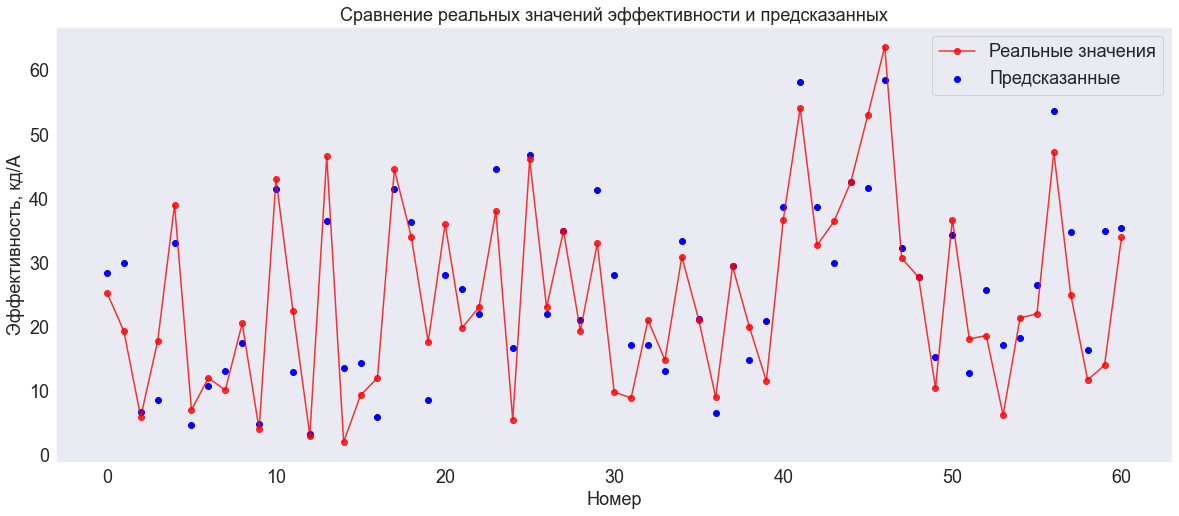

In [44]:
blablabla = list(range(len(y_test)))
plt.figure(figsize=(20,8))
plt.plot(blablabla, y_test, '-or', label='Реальные значения', alpha=0.8)
plt.scatter(blablabla, y_pred2, c='b', label='Предсказанные')
plt.title('Сравнение реальных значений эффективности и предсказанных', fontsize=18)
plt.xlabel('Номер', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('Эффективность, кд/А', fontsize=18)
plt.legend(fontsize=18)

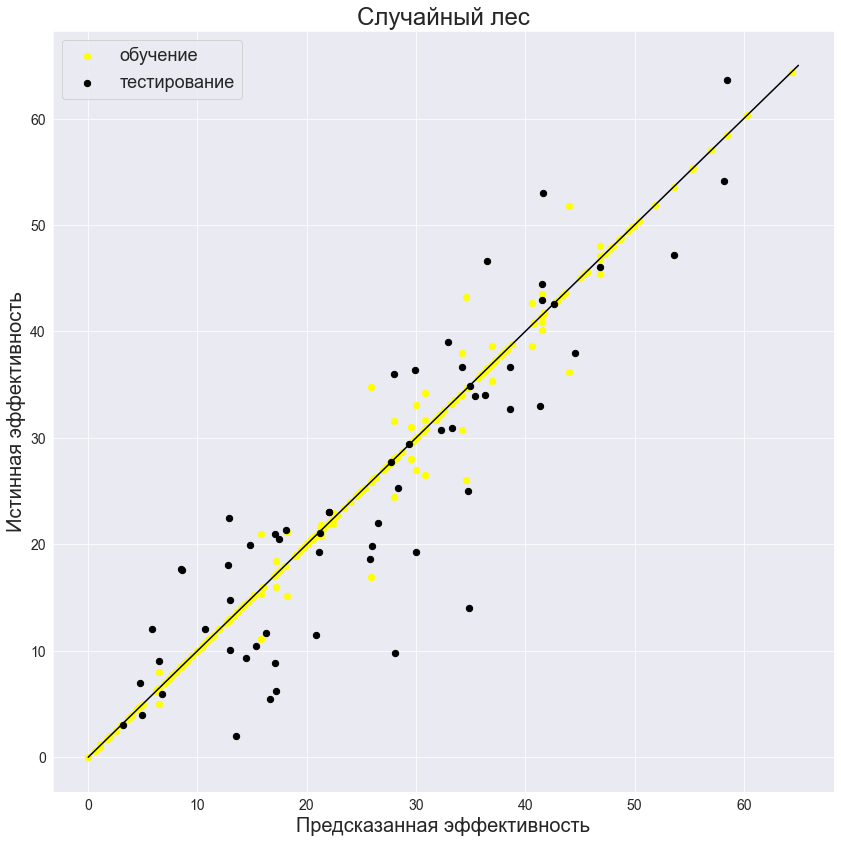

In [50]:
sns.set_style('darkgrid')

pred_train = regr.predict(X_train)

plt.figure(figsize=(14,14))
plt.scatter(pred_train, y_train, c='yellow', s=40, label='обучение')
plt.scatter(y_pred2, y_test, c='black', s=40, label='тестирование')
plt.plot([0, 65], [0,65], 'k-')
plt.legend(fontsize=18);
plt.ylabel('Истинная эффективность', fontsize=20)
plt.xlabel('Предсказанная эффективность', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Случайный лес',fontsize=24)
plt.xticks(fontsize=14)
plt.show()

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

X = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X[selected_features])

def test(models, X_train_scaled, X_test_scaled, y_train, y_test, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):

            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train_scaled, 
                                                         y_train).predict(X_test_scaled)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train_scaled, 
                                                          y_train).predict(X_train_scaled)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results, index=['train', 'test'])

models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

test(models,X_train_scaled, X_test_scaled, y_train, y_test)

,OLS,Lasso,Ridge
train,0.43423,0.330214,0.395257
test,0.36872,0.350741,0.427671


In [99]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(X_scaled, y).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X_scaled, y).best_estimator_,}

test(models2, X_train_scaled, X_test_scaled, y_train, y_test)

A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2213.090848926593, tolerance: 4.994512086666667
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525.4854563704321, tolerance: 4.994512086666667
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.1281864470693, tolerance: 4.994512086666667
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to inc

,OLS,Lasso,Ridge
train,0.43423,0.393330,0.310355
test,0.36872,0.421486,0.324634


In [100]:
lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[550, 580, 600, 620, 650]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso())])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge())])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params).fit(X_scaled, y).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params).fit(X_scaled, y).best_estimator_,}

test(models3, X_train_scaled, X_test_scaled, y_train, y_test)

A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3641.9872662283406, tolerance: 5.091775465185186
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2437.789251941387, tolerance: 4.994512086666667
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2988.0076377172913, tolerance: 4.87335032452675
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to in

,OLS,Lasso,Ridge
train,-0.238538,0.766286,0.420714
test,-2143.437149,0.525989,0.422798
